![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © 2016 Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Table of Contents
* [Introduction: preprocessing](#Introduction:-preprocessing)
* [Visualisation with Pandas](#Visualisation-with-Pandas)
* [Loading and Cleaning](#Loading-and-Cleaning)
* [General exploration](#General-exploration)
* [Feature Age](#Feature-Age)
* [Feature Sex](#Feature-Sex)
* [Feature Pclass](#Feature-Pclass)
* [Feature Fare](#Feature-Fare)
* [Feature Embarked](#Feature-Embarked)
* [Features SibSp](#Features-SibSp)
* [Feature ParCh](#Feature-ParCh)
* [Recap: Filling null values](#Recap:-Filling-null-values)
	* [Feature Age: null values](#Feature-Age:-null-values)
	* [Feature Embarking: null values](#Feature-Embarking:-null-values)
	* [Feature Cabin: null values](#Feature-Cabin:-null-values)
* [Encoding categorical features](#Encoding-categorical-features)
	* [Recap: encoding categorical features](#Recap:-encoding-categorical-features)
	* [Encoding Categorical Variables as Binary ones](#Encoding-Categorical-Variables-as-Binary-ones)
* [Cleaning: dropping](#Cleaning:-dropping)
* [Feature Engineering](#Feature-Engineering)


# Introduction: preprocessing

In the previous session, we introduced two libraries for visualisation: *matplotlib* and *seaborn*. We are going to review new functionalities in this notebook, as well as the integration of *pandas* with *matplotlib*.

Visualisation is usually combined with munging. We have done this in separated notebooks for learning purposes. We we are going to examine again the dataset, combinging both techniques, and applying the knowledge we got in the previous notebook.

# Visualisation with Pandas

Pandas provides a very good integration with matplotlib. DataFrames have the following methods:
* **plot()**, for a number of charts, that can be selected with the argument *kind*:
  * 'bar' for bar plots
  * 'hist' for histograms
  * 'box' for boxplots
  * 'kde' for density plots
  * 'area' for area plots
  * 'scatter' for scatter plots
  * 'hexbin' for hexagonal bin plots
  * 'pie' for pie charts
  
Every plot kind has an equivalent on Dataframe.plot accessor. This means, you can use **df.plot(kind='line')** or **df.plot.line**. Check the [plot documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) to learn the rest of parameters.

In addition, the module *pandas.tools.plotting* provides: **scatter_matrix**.

You can consult more details in the [documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

# Loading and Cleaning

In [1]:
# General import and load data
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots

#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline

In [2]:
#We get a URL with raw content (not HTML one)
url="https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"
df = pd.read_csv(url)
df_original = df.copy() # Copy to have a version of df without modifications
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Cleaning
df_clean = df.copy() # We copy to see what happens with na values
df_clean['Age'] = df['Age'].fillna(df['Age'].median())
df_clean.loc[df["Sex"] == "male", "Sex"] = 0
df_clean.loc[df["Sex"] == "female", "Sex"] = 1
df_clean.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
df_clean.loc[df["Embarked"] == "S", "Embarked"] = 0
df_clean.loc[df["Embarked"] == "C", "Embarked"] = 1
df_clean.loc[df["Embarked"] == "Q", "Embarked"] = 2
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


#  General exploration

In the previous session we saw that *Seaborn* provides several facilities for working with DataFrames. We are going to review some of them.

In [4]:
# General description of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Column types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Columns non numeric
df.dtypes[df.dtypes == object]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [7]:
# Number of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f994ad470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f99215160>]], dtype=object)

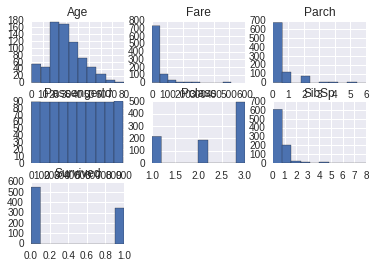

In [8]:
# Analise distributon
df.hist()

In [9]:
# We can see the pairwise correlation between variables. A value near 0 means low correlation
# while a value  near -1 or 1 indicates strong correlation.
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We do not find any relevant correlation. We could also represent this with a scatterplot.

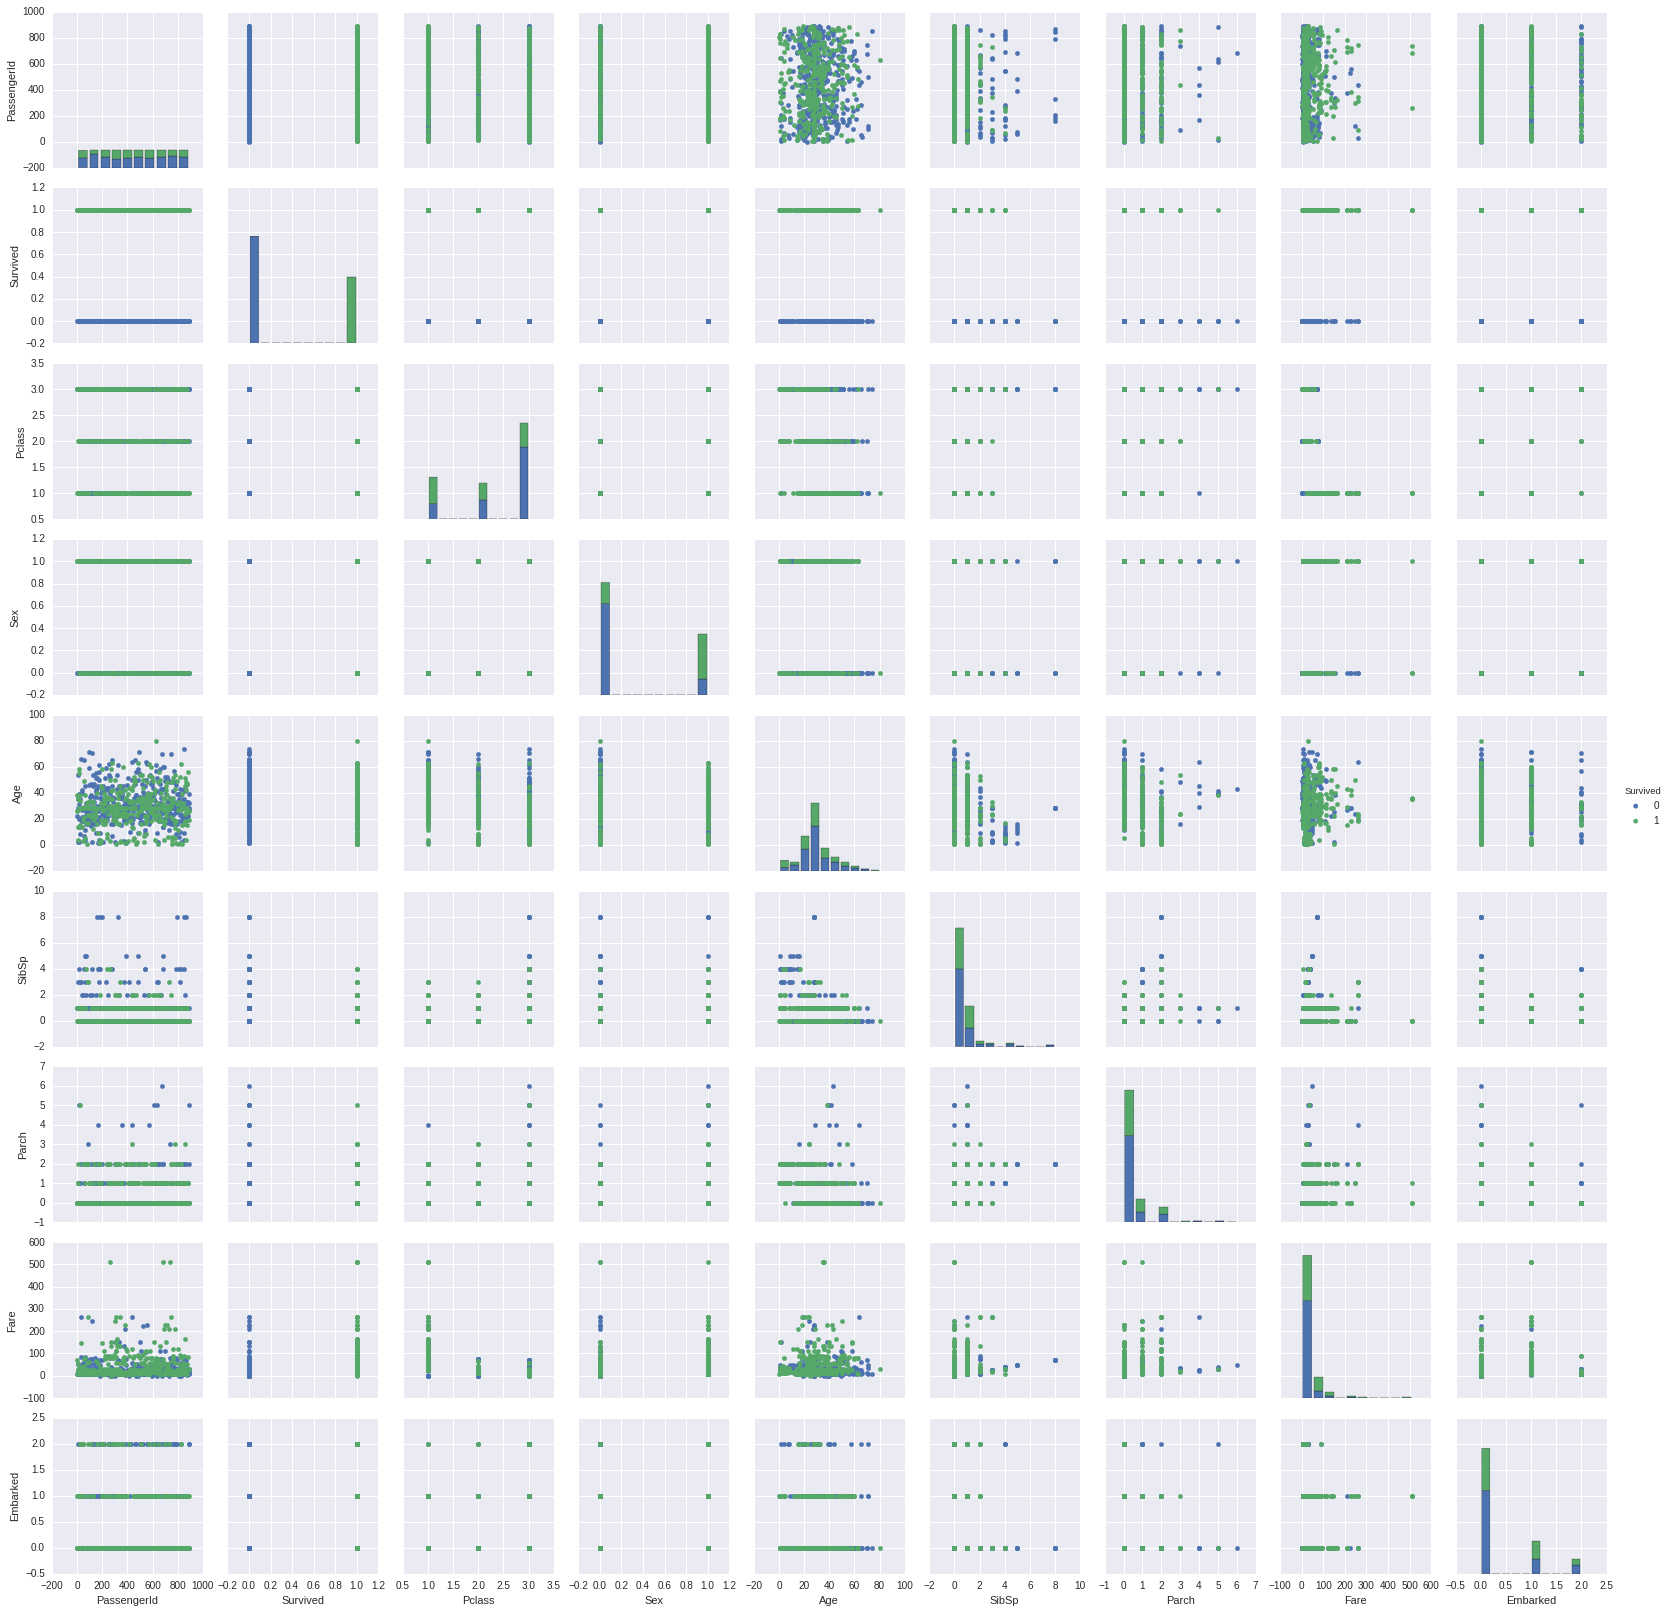

In [10]:
# General description of relationship betweek variables uwing Seaborn PairGrid
# We use df_clean, since the null values of df would gives us an error, you can check it.
g = sns.PairGrid(df_clean, hue="Survived")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

There are two many variables, we are going to represent only a subset.

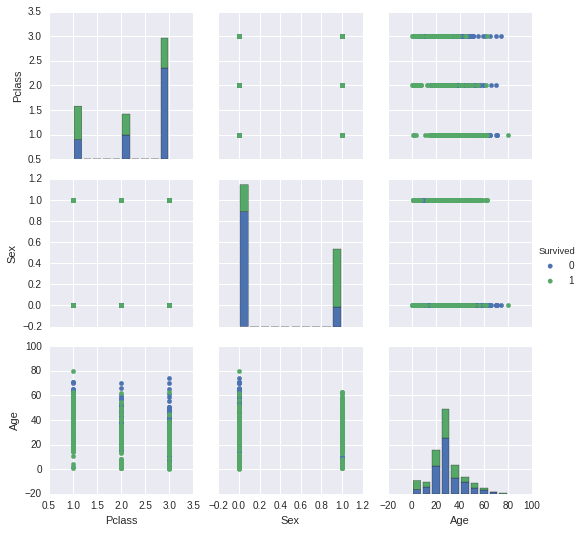

In [11]:
# PairGrid of variables
g = sns.PairGrid(df_clean, hue="Survived", vars=['Pclass', 'Sex', 'Age'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

We can observe, for example, that more women survived as well as more people in 3rd class. 

We can represent these findings.

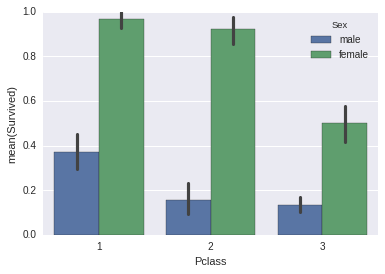

In [12]:
sns.barplot(x="Pclass", y='Survived', hue='Sex', data=df)

We can see that more women survived in all the passenger classes.

Now we are going to put in practice our knowledge about munging and visualisation. We will analyse every feature of the dataset.

# Feature Age

We saw that there are 177 missing values of age. We are going this feature with more detail.

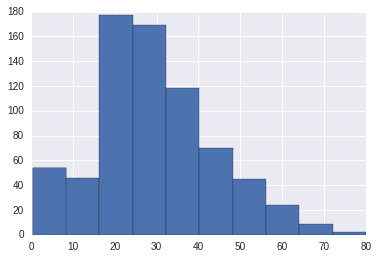

In [13]:
# Histogram of Age
# For Series, you can use hist(), plot.hist() or plot(kind='hist')
df['Age'].hist()

We see the histogram is slightly *right skewed* (*sesgada a la derecha*), so we will replace null values with the median instead of the mean.

In case we have a significant *skewed distribution*, the extreme values in the long tail can have a disproportionately large influence on our model. So, it can be good to transform the variable before building our model to reduce skewness.Taking the natural logarithm or the square root of each point are two simple transformations. 

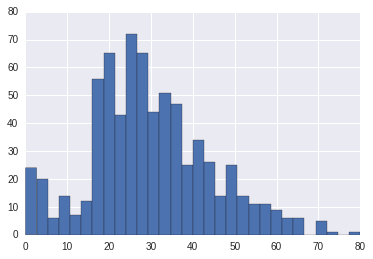

In [14]:
# We see with more bins the distribution
df['Age'].hist(bins=30, range=(0, df['Age'].max()))

Now we analyse the relationship of Age and Survived.

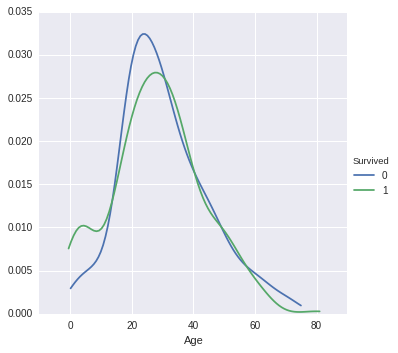

In [15]:
# Now we visualise age and survived to see if there is some relationship
sns.FacetGrid(df, hue="Survived", size=5).map(sns.kdeplot, "Age").add_legend()

We do no observe significant differences.

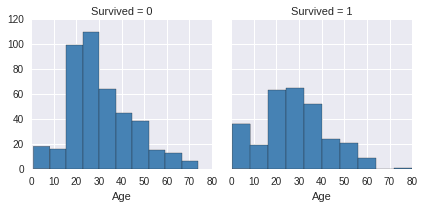

In [16]:
# We plot the histogram per age
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, "Age", color="steelblue")

We observe that non survived is left skewed. Most children survived.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f94ba0b38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f94a86358>], dtype=object)

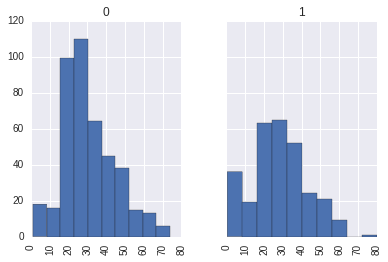

In [17]:
#Alternative to Seaborn with matplotlib integrated in pandas
df.hist(column='Age', by='Survived', sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f94accba8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f9492acc0>], dtype=object)

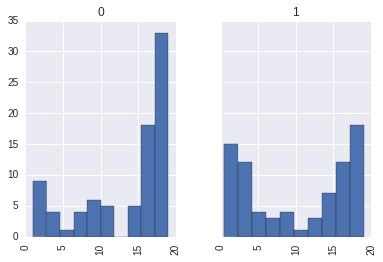

In [18]:
# We can observe the detail for children
df[df.Age < 20].hist(column='Age', by='Survived', sharey=True)

In [19]:
#Mean of survival for young
df[df.Age < 20]['Survived'].mean()

0.48170731707317072

There were null values, we will recap at the end of this notebook how to manage them.

We are going now to see the distribution of passengers younger than 20 that survived.

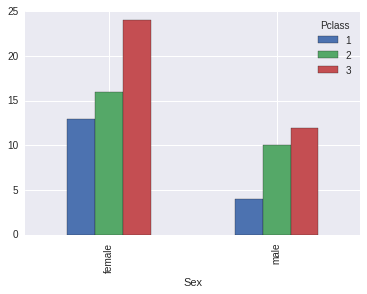

In [20]:
df.query('Age < 20 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Pclass']).plot(kind='bar')

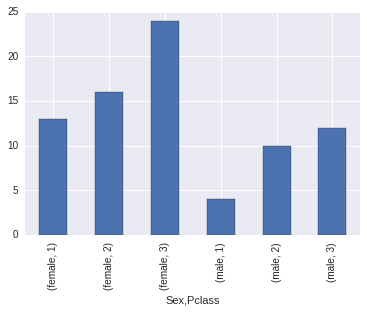

In [21]:
# Passengers older than 25 that survived grouped by Sex

df.query('Age < 20 and Survived == 1').groupby(['Sex','Pclass']).size().plot(kind='bar')

We are going to improve it a bit.

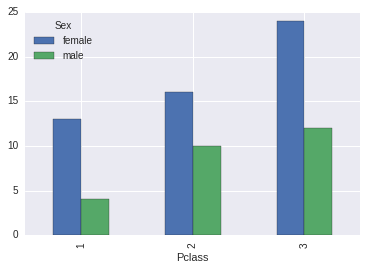

In [22]:
# We pass 'Sex' from columns to rows with unstack, so that now Pclass is in the columns
df.query('Age < 20 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='bar')

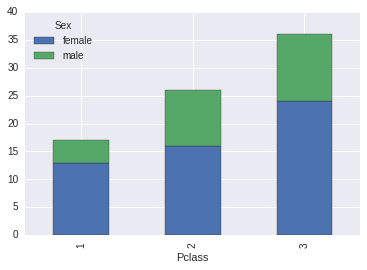

In [23]:
# Now we make that the plot shows both values combined, and change the labels
df.query('Age < 20 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='bar', \
                        
                                                                                              stacked=True)                                                                                                    

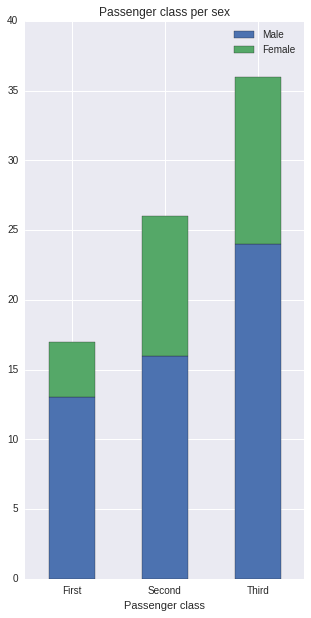

In [24]:
#Small touches

pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Age < 20 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='bar', 
                                                            stacked=True, rot=0, subplots=False, figsize=(5,10))
plt.set_xticklabels(pclass_labels)
plt.legend(labels=sex_labels)
plt.set_xlabel('Passenger class')
plt.set_title('Passenger class per sex')

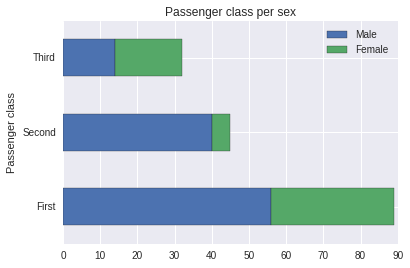

In [25]:
#The same horizontal
pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Age > 25 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='barh', 
                                                            stacked=True, rot=0, subplots=False)
plt.set_yticklabels(pclass_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Passenger class')
plt.set_title('Passenger class per sex')

# Feature Sex

We are now going to explore the Sex attribute

In [26]:
# How many passengers by sex
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

We see men are more numerous than women.

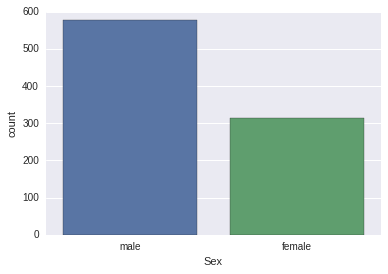

In [27]:
# Plot with seaborn
sns.countplot('Sex', data=df)

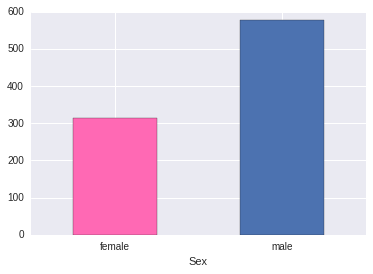

In [28]:
# Same graph with matplotlib and pandas
colors_sex = ['#ff69b4', 'b']
df.groupby('Sex').size().plot(kind='bar', rot=0, color=colors_sex)

In [29]:
# How many passergers survived by sex
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [30]:
# How many passergers survived by sex
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

We see that 74% of female survived, while only 18% of male survived.

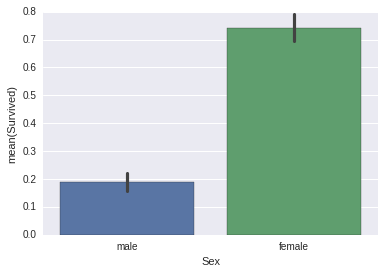

In [31]:
#Graphical representation
# You can add the parameter estimator to change the estimator. (e.g. estimator=np.median)
# For example, estimator=np.size is you get the same chart than with countplot
#sns.barplot(x='Sex', y='Survived', data=df, estimator=np.size)
sns.barplot(x='Sex', y='Survived', data=df)

We can see now if men and women follow the same age distribution.

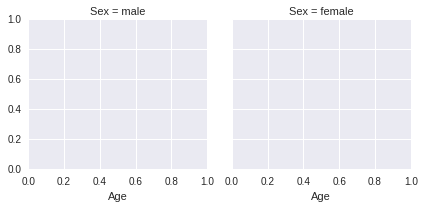

In [87]:
g = sns.FacetGrid(df, col='Sex')
g.map(plt.hist, "Age", color="steelblue")

It seems they follow a similar distribution. We can separate per passenger class.

In [88]:
g = sns.FacetGrid(df, col='Sex', row='Pclass')
g.map(plt.hist, "Age", color="steelblue")

KeyError: 'Pclass'

We see there are more young men in third class. 

# Feature Pclass

We have already seen how passengers are distributed with Pclass

In [34]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

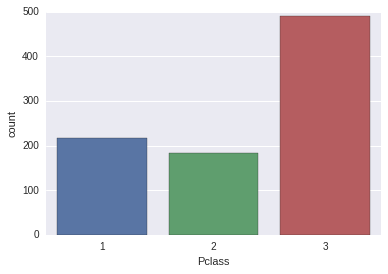

In [35]:
# Distribution
sns.countplot('Pclass', data=df)

Most passengers are in 3rd class.

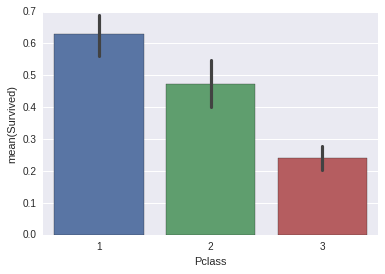

In [36]:
# Survivors per class
sns.barplot(x='Pclass', y='Survived', data=df)

As expected, passenger class is very significant, since most survivors are in first class.

We can also see the distribution of classes per sex.

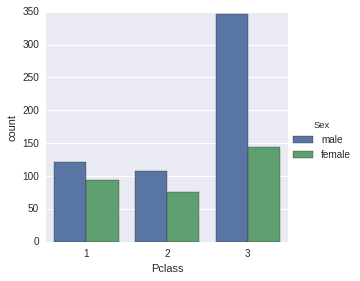

In [37]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

In [38]:
df.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

We see most women in first class and second survived, 96% and 92% respectively.

# Feature Fare

We are going to analyse the feature *Fare* and will take the opportunity to introduce how to manage outliers.

As we see in the PairGrid chart, Fare is directly related to the Passenger class.

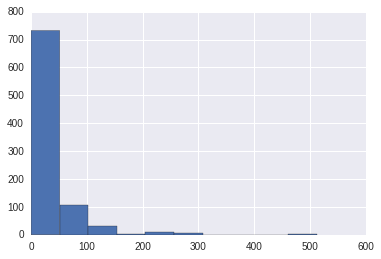

In [39]:
df['Fare'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f8feb4160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f8fe02e48>]], dtype=object)

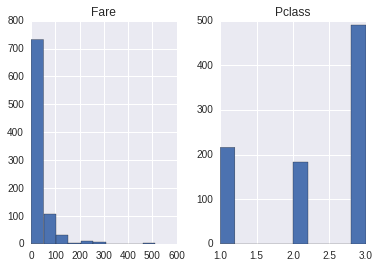

In [40]:
df.hist(['Fare','Pclass'])

We see the distribution is right sweked. We are going to detect outliers using a box plot

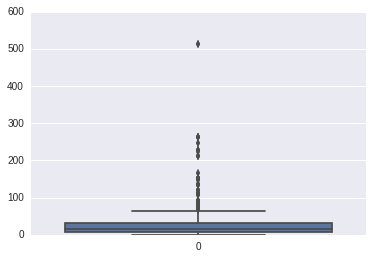

In [41]:
sns.boxplot(data=df['Fare'])

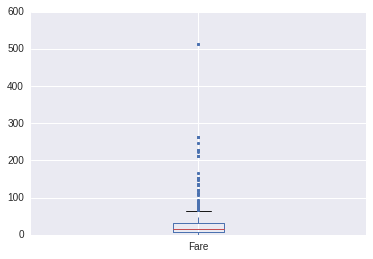

In [42]:
# We can see the same with matplotlib.
# There is a bug and if you import seaborn, you should add 'sym='k.' to show the outliers
df.boxplot(column='Fare', return_type='axes', sym='k.')

Since Fare depends on Pclass, we are going to show outliers per passenger class.

OrderedDict([('Fare',
              <matplotlib.axes._subplots.AxesSubplot at 0x7f2f8fdb73c8>)])

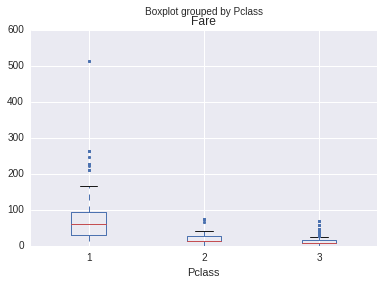

In [43]:
df.boxplot(column='Fare', by = 'Pclass', return_type='axes', sym='k.')

We see that most outliers are in class 1. In particular, we see some values higher thatn 500 that should be an error.

In [44]:
df[df.Fare > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


We can replace this value by the median(), the mean(), or the second highest value.

In [45]:
#Calculate hight values
df.sort_values('Fare', ascending=False).head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [46]:
# Replace
df.loc[df.Fare > 400, 'Fare'] = 263.0

# Check we have removed outliers
df.sort_values('Fare', ascending=False).head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,263.000,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,263.000,B101,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,263.000,B51 B53 B55,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


OrderedDict([('Fare',
              <matplotlib.axes._subplots.AxesSubplot at 0x7f2f8fcb91d0>)])

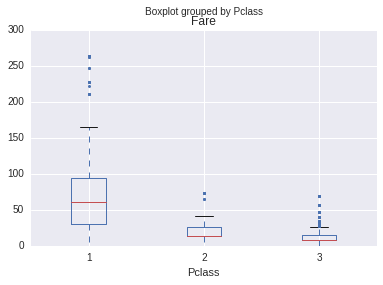

In [47]:
df.boxplot(column='Fare', by='Pclass', return_type='axes', sym='k.')

# Feature Embarked

We can analyze the distribution based on the port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton). 

In [48]:
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

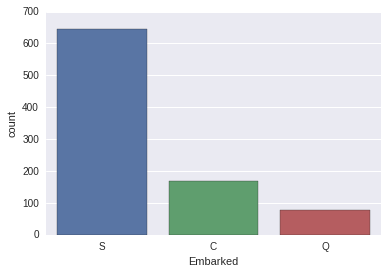

In [49]:
# Distribution
sns.countplot('Embarked', data=df)

Since there are missing values, we will replace them by the most popular value ('S'), and we will also encode it since it is a categorical variable.

We can see if this has impact on its survival.

In [50]:
df.groupby(['Embarked']).Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

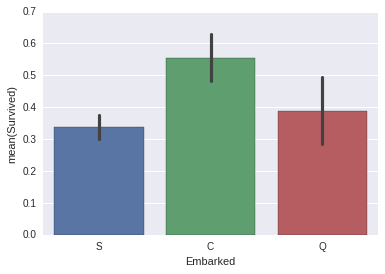

In [51]:
sns.barplot(x='Embarked', y='Survived', data=df)

It seems passengers embarked in C (Cherbourg) have a higher chance of survival.
We can analyse this by sex.

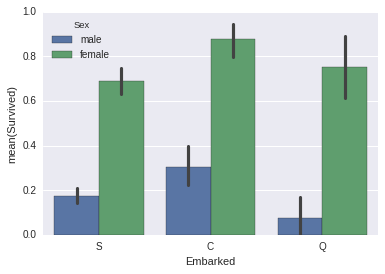

In [52]:
sns.barplot(x="Embarked", y='Survived', hue='Sex', data=df)

There is also an improvement by gender for passengers embarking in Cherbourg.

We have to fill null values (2 null values) and encode this variable, since it is categorical. We will do it after reviewing the rest of features.

# Features SibSp

We analyse the distribution.

In [53]:
df.groupby('SibSp').size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

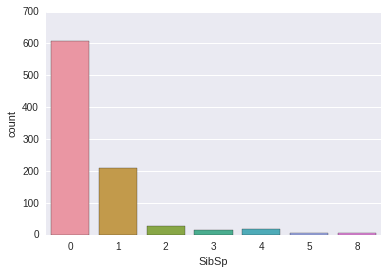

In [54]:
# Distribution
sns.countplot('SibSp', data=df)

We can see that most passengers traveled without siblings or spouses. 

We analyse if this had impact on its survival.

In [55]:
df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f8f9e30f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f8f91a160>], dtype=object)

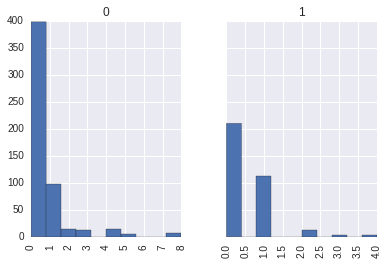

In [56]:
df.hist(column='SibSp', by='Survived', sharey=True)

We see that it does not provide too much information. While the survival mean of all passengers is 38%, passengers with 0 SibSp has 34% of probability. Surprisingly, passengers with 1 sibling or spouse have a higher probability, 53%. We are going to see the distribution by gender

In [57]:
df.groupby(['SibSp', 'Sex']).size()

SibSp  Sex   
0      female    174
       male      434
1      female    106
       male      103
2      female     13
       male       15
3      female     11
       male        5
4      female      6
       male       12
5      female      1
       male        4
8      female      3
       male        4
dtype: int64

We see that for SibSp, there is almost the same number of men and women. Now we calculate the survival probability.

In [58]:
df.groupby(['SibSp', 'Sex']).Survived.mean()

SibSp  Sex   
0      female    0.787356
       male      0.168203
1      female    0.754717
       male      0.310680
2      female    0.769231
       male      0.200000
3      female    0.363636
       male      0.000000
4      female    0.333333
       male      0.083333
5      female    0.000000
       male      0.000000
8      female    0.000000
       male      0.000000
Name: Survived, dtype: float64

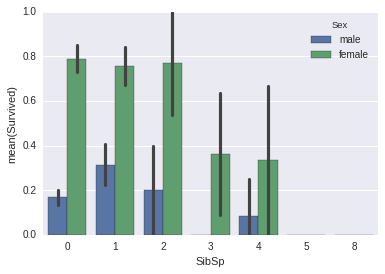

In [59]:
sns.barplot(x="SibSp", y='Survived', hue='Sex', data=df)

We observe that when SibSp > 2, the survival probability decreases to the half. We are going to check if there is a difference in the age. 

In [60]:
df.groupby(['SibSp', 'Sex']).Age.mean()

SibSp  Sex   
0      female    28.631944
       male      32.615443
1      female    30.738889
       male      29.461505
2      female    16.541667
       male      28.230769
3      female    16.500000
       male       8.750000
4      female     8.333333
       male       6.416667
5      female    16.000000
       male       8.750000
8      female          NaN
       male            NaN
Name: Age, dtype: float64

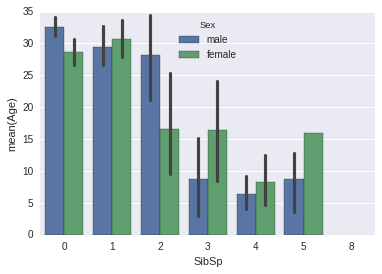

In [61]:
sns.barplot(x="SibSp", y='Age', hue='Sex', data=df)

Effectively, when SibSp > 3, age is lower. We are going to check the relationship with Pclass.

In [62]:
df.groupby(['SibSp', 'Pclass']).size()

SibSp  Pclass
0      1         137
       2         120
       3         351
1      1          71
       2          55
       3          83
2      1           5
       2           8
       3          15
3      1           3
       2           1
       3          12
4      3          18
5      3           5
8      3           7
dtype: int64

In [63]:
df.groupby(['SibSp', 'Pclass']).Survived.mean()

SibSp  Pclass
0      1         0.562044
       2         0.416667
       3         0.236467
1      1         0.746479
       2         0.581818
       3         0.325301
2      1         0.800000
       2         0.500000
       3         0.333333
3      1         0.666667
       2         1.000000
       3         0.083333
4      3         0.166667
5      3         0.000000
8      3         0.000000
Name: Survived, dtype: float64

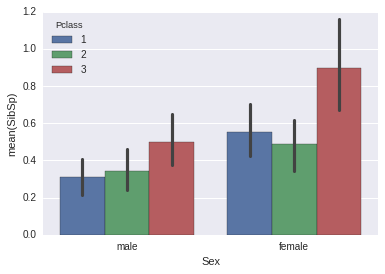

In [64]:
sns.barplot(x="Sex", y='SibSp', hue='Pclass', data=df)

We see that in 3rd class, females had higher SibSp.

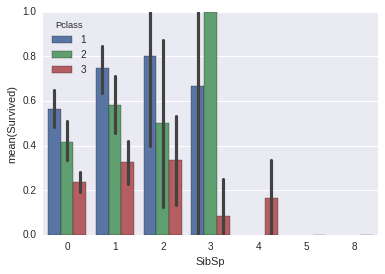

In [65]:
sns.barplot(x="SibSp", y='Survived', hue='Pclass', data=df)

It seems that SibSp is relevant for determining the survival rate.

## Feature ParCh

The feature Parch (Parents-Children Aboard) is somewhat related to the previous one, since it reflects family ties. It is well known that in emergencies, family groups often all die or evacuate together, so it is expected that it will also have an impact on our model.

In [66]:
df.groupby('Parch').size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

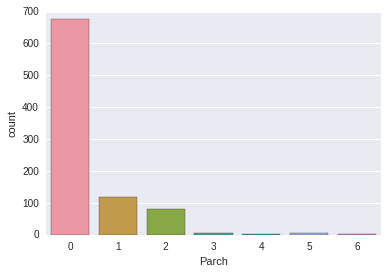

In [67]:
# Distribution
sns.countplot('Parch', data=df)

We see most of the passenger had any parent or children.

We analyze now the relationship with Survived.

In [68]:
df.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

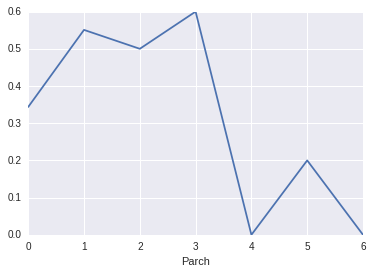

In [69]:
#Probability survival
df.groupby('Parch').Survived.mean().plot()

We see the probability of surviving is higher in 2 and 3. Sincethere were too few rows for Parch >= 3, this part is not relevant.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f8f4fbe10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f8f3c1240>], dtype=object)

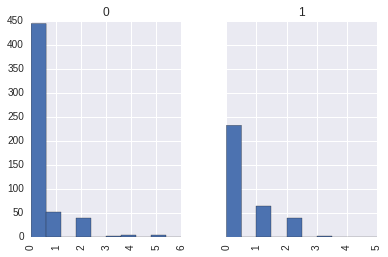

In [70]:
df.hist(column='Parch', by='Survived', sharey=True)

In [71]:
df.groupby(['Pclass', 'Sex', 'Parch'])['Parch', 'SibSp', 'Survived'].agg({'Parch': np.size, 'SibSp': np.mean, 'Survived': np.mean})

Survived     SibSp  Parch
Pclass Sex    Parch                           
1      female 0      0.984375  0.484375     64
              1      1.000000  0.411765     17
              2      0.846154  1.076923     13
       male   0      0.363636  0.262626     99
              1      0.285714  0.357143     14
              2      0.625000  0.750000      8
              4      0.000000  1.000000      1
2      female 0      0.888889  0.333333     45
              1      0.944444  0.722222     18
              2      1.000000  0.545455     11
              3      1.000000  1.500000      2
       male   0      0.089888  0.224719     89
              1      0.500000  1.071429     14
              2      0.400000  0.400000      5
3      female 0      0.588235  0.341176     85
              1      0.480000  1.240000     25
              2      0.320000  2.560000     25
              3      0.500000  0.500000      2
              4      0.000000  0.500000      2
              5      0.250000  0.500000      4
              6      0.000000  1.000000      1
       male   0      0.121622  0.135135    296
              1      0.266667  1.900000     30
              2      0.166667  4.055556     18
              3      0.000000  1.000000      1
              4      0.000000  1.000000      1
              5      0.000000  1.000000      1

We observe that Parch has an important impact for men in first and second class. We are going to check the age.

In [72]:
df.query('(Sex == "male") and (Pclass == [1, 2]) and (Parch == [1, 2])')[['Survived', 'Age']].mean()

Survived     0.439024
Age         27.871951
dtype: float64

We see that in those cases, the age is 27. We can compare with the rest of men if first and second class.

In [73]:
df.query('(Sex == "male") and (Pclass == [1, 2])')[['Survived', 'Age']].mean()

Survived     0.269565
Age         36.063750
dtype: float64

We observe that there is a significant difference, so we suspect that this feature has impact of men in first and second class.

# Recap: Filling null values

## Feature Age: null values

We fill null values of Age with its median.

In [74]:
# We create a new feature to maintain the original 
df['AgeFilled'] = df['Age'].fillna(df['Age'].median())
df['AgeFilled'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: AgeFilled, dtype: float64

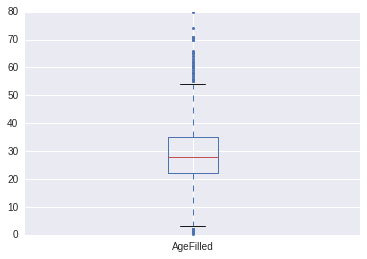

In [75]:
# Bug: if you include Seaborn,  add 'sym='k.' to show the outliers
df.boxplot(column='AgeFilled', return_type='axes', sym='k.')

Another alternative is to use the function interpolate().

In [76]:
df['AgeFilled'] = df['Age'].interpolate()
df['AgeFilled'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: AgeFilled, dtype: float64

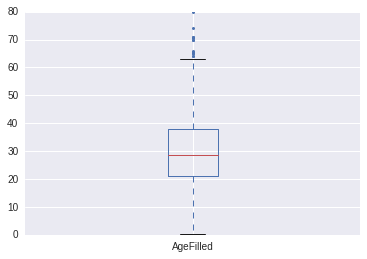

In [77]:
# Bug: if you include Seaborn,  add 'sym='k.' to show the outliers
df.boxplot(column='AgeFilled', return_type='axes', sym='k.')

## Feature Embarking: null values

We see most passengers are in 'S'. There were also missing values.

In [78]:
df['Embarked'].isnull().sum()

2

As we discussed previously, we will replace these missing values by the most popular one (mode): S.

In [79]:
#Replace nulls with the most common value
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].isnull().any()

False

## Feature Cabin: null values

We are going to analyse Cabin in the exercise

# Encoding categorical features

## Recap: encoding categorical features

In the previous notebook we saw how to encode categorical features. We are going to explore an alternative way.

In [80]:
#df = df_original.copy()
#df['SexEncoded'] = df.Sex
#
#df.loc[df["SexEncoded"] == 'male', "SexEncoded"] = 0
#df.loc[df["SexEncoded"] == "female", "SexEncoded"] = 1
#
#df['EmbarkedEncoded'] = df.Embarked
#df.loc[df["EmbarkedEncoded"] == "S", "EmbarkedEncoded"] = 0
#df.loc[df["EmbarkedEncoded"] == "C", "EmbarkedEncoded"] = 1
#df.loc[df["EmbarkedEncoded"] == "Q", "EmbarkedEncoded"] = 2
#df.head()

## Encoding Categorical Variables as Binary ones

As we see previously, translating categorical variables into integer can introduce an order. In our case, this is not a problem, since *Sex* is a binary variable, and we can consider there exists an order in *Pclass*.

Nevertheless, we are going to introduce a general approach to encode categorical variables using some facilities provided by scikit-learn.

**LabelEncoder** transform categories into integers (0, 1, ...). We are going to use it for *Sex*.

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = df_original.copy() # take original df

# We define here the categorical columns have non integer values, so we need to convert them
# into integers first with LabelEncoder. This can be omitted if the are already integers.

label_enc = LabelEncoder()
label_sex = label_enc.fit_transform(df['Sex'])
df['SexCoded'] = label_sex

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Ok, we see it has been easy and we have *Sex* as a binary variable.

Now we are going to do the same with *Embarked* and *Pclass*. There are several alternatives in scikit-learn, such as *DictVectorizer* or *OneHotEncoder*.

We are going to use *pd.get_dummies*, which provides a very easy-to-use way to encode categorical variables.

In [82]:
#Remove nulls
df['Embarked'].fillna('S', inplace=True)
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'])
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SexCoded,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0.0,0.0,1.0,0.0,0.0,1.0


# Cleaning: dropping

We should drop columns we will not use. In the exercise, you will need to use 'Cabin'.

In [83]:
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,SexCoded,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0


# Feature Engineering

Feature Engineering is the process of using domain/expert  knowledge of the data to create features that make machine learning algorithms work better. We are going to define several [new ones](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/).

# References

* [Basic Feature Engineering with the Titanic Data](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© 2016 Carlos A. Iglesias, Universidad Politécnica de Madrid.